تحلیل شبکه ای در پایتون

In [13]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.colors as mcolors 
from networkx.algorithms.community.centrality import girvan_newman 
from networkx.algorithms.community.kclique import k_clique_communities


In [24]:
df = pd.DataFrame(np.random.randint(0,100,size=(1000,2)), columns=list('AB'))

df

,A,B
0,38,0
1,81,10
2,74,99
3,69,78
4,57,36
...,...,...
995,90,5
996,28,47
997,74,89
998,98,92


In [25]:
G = nx.from_pandas_edgelist(df, 'A', 'B')

In [26]:
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))


Graph has 100 nodes and 904 edges.
Nodes: [38, 0, 81, 10, 74, 99, 69, 78, 57, 36, 90, 1, 86, 6, 9, 82, 60, 87, 14, 95, 68, 85, 4, 31, 26, 96, 47, 84, 46, 54, 15, 21, 11, 89, 97, 59, 7, 27, 23, 2, 70, 50, 72, 61, 22, 94, 91, 79, 75, 55, 64, 71, 13, 56, 5, 30, 48, 24, 51, 73, 62, 25, 93, 19, 92, 12, 3, 58, 66, 33, 53, 39, 17, 28, 80, 35, 83, 88, 37, 29, 32, 16, 42, 8, 67, 49, 45, 40, 34, 18, 98, 76, 41, 20, 43, 44, 63, 77, 65, 52]
Edges: [(38, 0), (38, 2), (38, 62), (38, 92), (38, 13), (38, 3), (38, 15), (38, 84), (38, 57), (38, 91), (38, 67), (38, 41), (38, 81), (38, 24), (38, 68), (0, 82), (0, 96), (0, 55), (0, 64), (0, 57), (0, 35), (0, 69), (0, 54), (0, 27), (0, 74), (0, 76), (0, 59), (0, 19), (0, 40), (0, 63), (0, 87), (0, 70), (0, 88), (0, 7), (0, 77), (0, 2), (0, 39), (0, 53), (0, 22), (81, 10), (81, 90), (81, 27), (81, 74), (81, 43), (81, 5), (81, 2), (81, 45), (81, 1), (81, 46), (81, 70), (81, 48), (81, 28), (81, 89), (81, 49), (81, 62), (10, 24), (10, 51), (10, 60), (10, 53), (

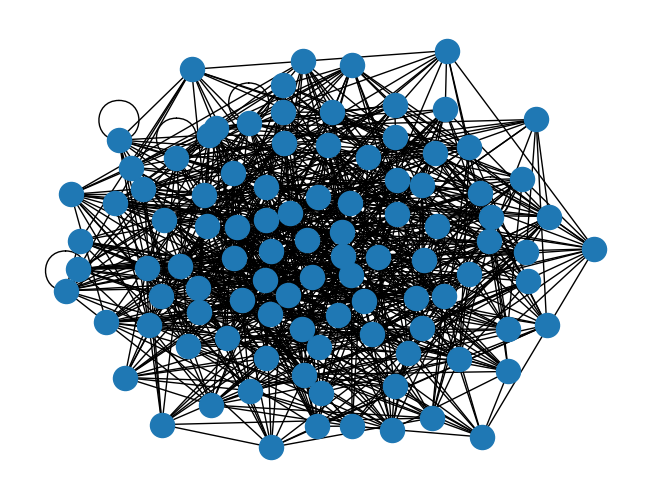

In [27]:
nx.draw(G)
plt.show()

In [28]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized= True, endpoints= True)

(np.float64(-1.171498075740425),
 np.float64(1.1798129873531518),
 np.float64(-1.1523599735154364),
 np.float64(1.204522893410969))

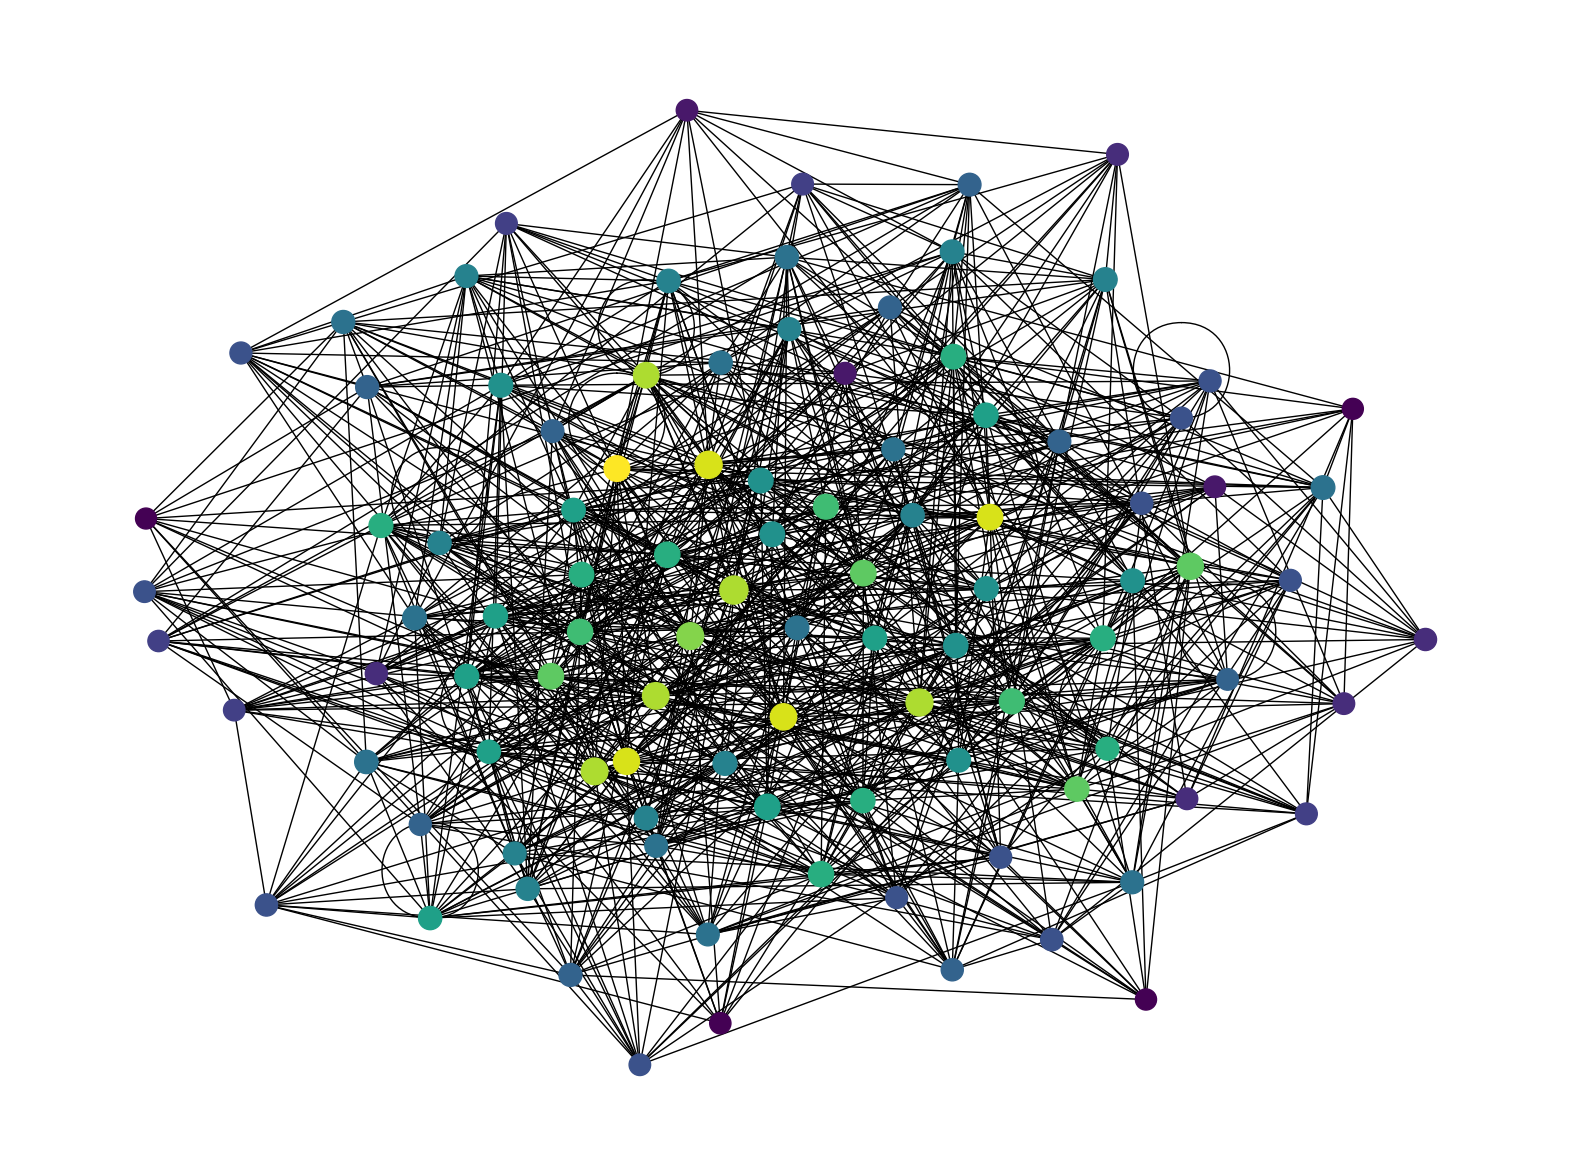

In [29]:
node_color = [20000.0 * G.degree(v) for v in G]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize= (20 , 15))
nx.draw_networkx(G, pos= pos, with_labels= False, node_color= node_color, node_size= node_size)
plt.axis('off')

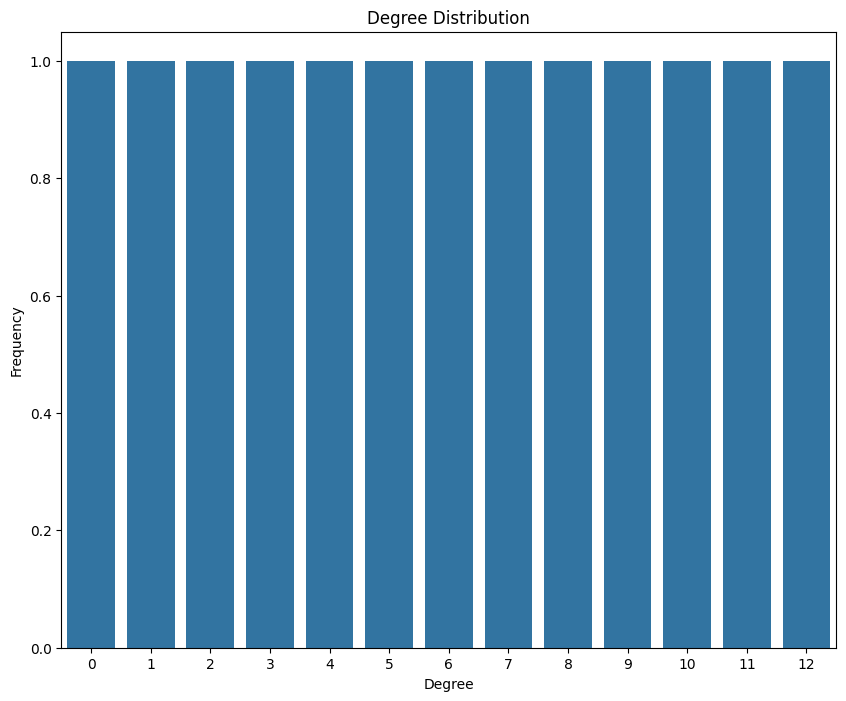

In [37]:
df = pd.DataFrame(np.random.randint(0,100,size=(1000,2)), columns=list('AB'))
G = nx.from_pandas_edgelist(df, 'A', 'B')
plt.figure(figsize=(10, 8))
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    deg = sorted(degrees)
    degrees = deg[-13:]  
    sns.countplot(degrees)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()


plot_degree_dist(G)

In [38]:
nx.number_connected_components(G)

1

In [41]:
UG = G.to_undirected()
connected_components = nx.connected_components(UG)
sub_graphs = [UG.subgraph(component).copy() for component in connected_components]
for i, sg in enumerate(sub_graphs):
    print(f"Subgraph {i} has {sg.number_of_nodes()} nodes and {sg.number_of_edges()} edges.")

Subgraph 0 has 100 nodes and 910 edges.


محاسبه ی شاخص های کلان شبکه

In [42]:
nx.density(G)

0.18383838383838383

In [43]:
nx.average_clustering(G)

0.18003781178691736

In [44]:
clustering= nx.clustering(G)
clustering2= list(clustering.items())
clustering2.sort(key = lambda x:x[1], reverse= True)
clustering2

[(42, 0.2916666666666667),
 (5, 0.2619047619047619),
 (34, 0.25735294117647056),
 (68, 0.24561403508771928),
 (50, 0.24444444444444444),
 (37, 0.24175824175824176),
 (71, 0.23529411764705882),
 (44, 0.22875816993464052),
 (85, 0.22857142857142856),
 (56, 0.22826086956521738),
 (79, 0.22794117647058823),
 (75, 0.22631578947368422),
 (9, 0.2222222222222222),
 (62, 0.2222222222222222),
 (39, 0.2222222222222222),
 (61, 0.21978021978021978),
 (27, 0.21904761904761905),
 (28, 0.21637426900584794),
 (29, 0.20948616600790515),
 (1, 0.2077922077922078),
 (15, 0.20588235294117646),
 (99, 0.2),
 (55, 0.2),
 (53, 0.19883040935672514),
 (33, 0.19607843137254902),
 (52, 0.19607843137254902),
 (98, 0.19473684210526315),
 (51, 0.19473684210526315),
 (64, 0.19473684210526315),
 (19, 0.19298245614035087),
 (97, 0.19202898550724637),
 (89, 0.19202898550724637),
 (69, 0.19166666666666668),
 (74, 0.19117647058823528),
 (65, 0.19047619047619047),
 (3, 0.18681318681318682),
 (59, 0.18571428571428572),
 (92, 

In [ ]:
for C in nx.connected_components(G):
    subgraph = G.subgraph(component).copy()
    print(nx.average_shortest_path_length(subgraph))

1.8474747474747475


In [54]:
for C in nx.connected_components(G):
    subgraph = G.subgraph(component).copy()
    print(nx.diameter(subgraph))

3


In [57]:
eigenvector= nx.eigenvector_centrality_numpy(G)
import operator 
sorted(eigenvector.items(), key= operator.itemgetter(1), reverse= True) [:10]

[(52, 0.18959334996225605),
 (45, 0.14453269799242371),
 (29, 0.14178887520980002),
 (86, 0.1383064525920742),
 (97, 0.13717251772723718),
 (56, 0.1371146350205195),
 (38, 0.13473668436908187),
 (66, 0.13362927643892233),
 (89, 0.13196547547057158),
 (26, 0.1286269048201802)]

In [59]:
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key= operator.itemgetter(1), reverse= True) [:10]

[(52, 0.6036585365853658),
 (45, 0.5857988165680473),
 (26, 0.5722543352601156),
 (86, 0.5722543352601156),
 (38, 0.5722543352601156),
 (66, 0.5722543352601156),
 (97, 0.5689655172413793),
 (92, 0.5689655172413793),
 (56, 0.5657142857142857),
 (89, 0.5657142857142857)]

In [61]:
btwncent= nx.betweenness_centrality(G, normalized= True, endpoints= False)
sorted(btwncent.items(), key= operator.itemgetter(1), reverse= True) [:10]

[(52, 0.028918592099872333),
 (45, 0.02545979130398622),
 (66, 0.017062903905100506),
 (26, 0.017014567522014527),
 (38, 0.015471924923961638),
 (86, 0.015454378740972495),
 (97, 0.01520229965096301),
 (92, 0.015034780165557432),
 (89, 0.014711605845011922),
 (82, 0.014259057275428446)]

In [62]:
degree= nx.degree_centrality(G)
sorted(degree.items(), key= operator.itemgetter(1), reverse= True) [:10]

[(52, 0.3434343434343435),
 (45, 0.29292929292929293),
 (26, 0.25252525252525254),
 (86, 0.25252525252525254),
 (38, 0.25252525252525254),
 (29, 0.25252525252525254),
 (66, 0.25252525252525254),
 (56, 0.24242424242424243),
 (97, 0.24242424242424243),
 (89, 0.24242424242424243)]

In [63]:
common= [(e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1]))))
for e in nx.non_edges(G)]
sorted(common, key= lambda x:x[2], reverse= True) [:10]

[(52, 54, 11),
 (6, 86, 10),
 (7, 52, 10),
 (26, 66, 10),
 (38, 52, 10),
 (40, 97, 10),
 (45, 52, 10),
 (45, 64, 10),
 (52, 56, 10),
 (52, 82, 10)]

In [65]:
nx.clustering(G, 71)

0.23529411764705882

In [66]:
nx.transitivity(G)

0.18163808580449453